In [1]:
import pandas
import seaborn

In [2]:
df = pandas.read_pickle("5-value-iterations.pkl.gz")
df

,problem,model,force_consider_own,merge_isomorphic,truncate_common_chain,collect_garbage,reward_common_chain,protocol,dag_size_limit,size,...,vi_time,vi_max_value,ss_reachable,ss_nonzero,ss_time,pe_iter,ptrev,rpp,time,vi_steady_value
0,ref-fc16,fc16sapirshtein,True,True,True,True,True,bitcoin,4,18,...,0.082897,7.771851,5,3,0.057045,2,0.049500,0.050000,0.140702,4.940165
1,ref-aft20,aft20barzur,True,True,True,True,True,bitcoin,4,15,...,0.140976,7.771451,6,6,0.069772,2,0.024750,0.050000,0.211393,4.939711
2,v1+fc,generic-v1,True,False,True,True,True,bitcoin,4,58,...,0.409127,7.704237,6,6,0.001095,2,0.024750,0.050000,0.411333,4.940165
3,v1,generic-v1,False,False,True,True,True,parallel_3,4,206,...,0.858090,8.506424,81,81,0.002198,2,0.023429,0.050000,0.863508,4.878068
4,v1+fc,generic-v1,True,False,True,True,True,ethereum_3,4,78,...,0.395735,7.935179,48,48,0.001583,2,0.024266,0.052483,0.398711,5.197259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,v1+fc+n,generic-v1,True,True,True,True,True,parallel_3,4,84,...,0.622244,50.675099,48,48,0.001360,2,0.240149,0.500000,0.624944,48.753834
476,v0+fc+n,generic-v0,True,True,True,True,True,bitcoin,4,104,...,1.153713,66.923274,29,29,0.001094,2,0.224633,0.665339,1.156900,65.944847
477,v0,generic-v0,False,False,True,True,True,bitcoin,4,1198,...,17.956223,59.261821,39,39,0.001257,2,0.167256,0.585214,17.980531,58.125074
478,v0,generic-v0,False,False,True,True,True,bitcoin,4,1198,...,16.577531,61.580242,39,39,0.001672,2,0.170215,0.610649,16.600258,60.567219


In [3]:
df.columns

Index(['problem', 'model', 'force_consider_own', 'merge_isomorphic',
       'truncate_common_chain', 'collect_garbage', 'reward_common_chain',
       'protocol', 'dag_size_limit', 'size', 'time_spent', 'rss', 'mdp',
       'horizon', 'alpha', 'gamma', 'vi_discount', 'vi_delta', 'vi_stop_delta',
       'vi_progress', 'vi_iter', 'vi_max_iter', 'vi_time', 'vi_max_value',
       'ss_reachable', 'ss_nonzero', 'ss_time', 'pe_iter', 'ptrev', 'rpp',
       'time', 'vi_steady_value'],
      dtype='object')

In [4]:
dsl = df.dag_size_limit.drop_duplicates()
assert len(dsl) == 1
dag_size_limit = dsl.iloc[0]
dag_size_limit

4

# Reward per progress, source-model, steady state

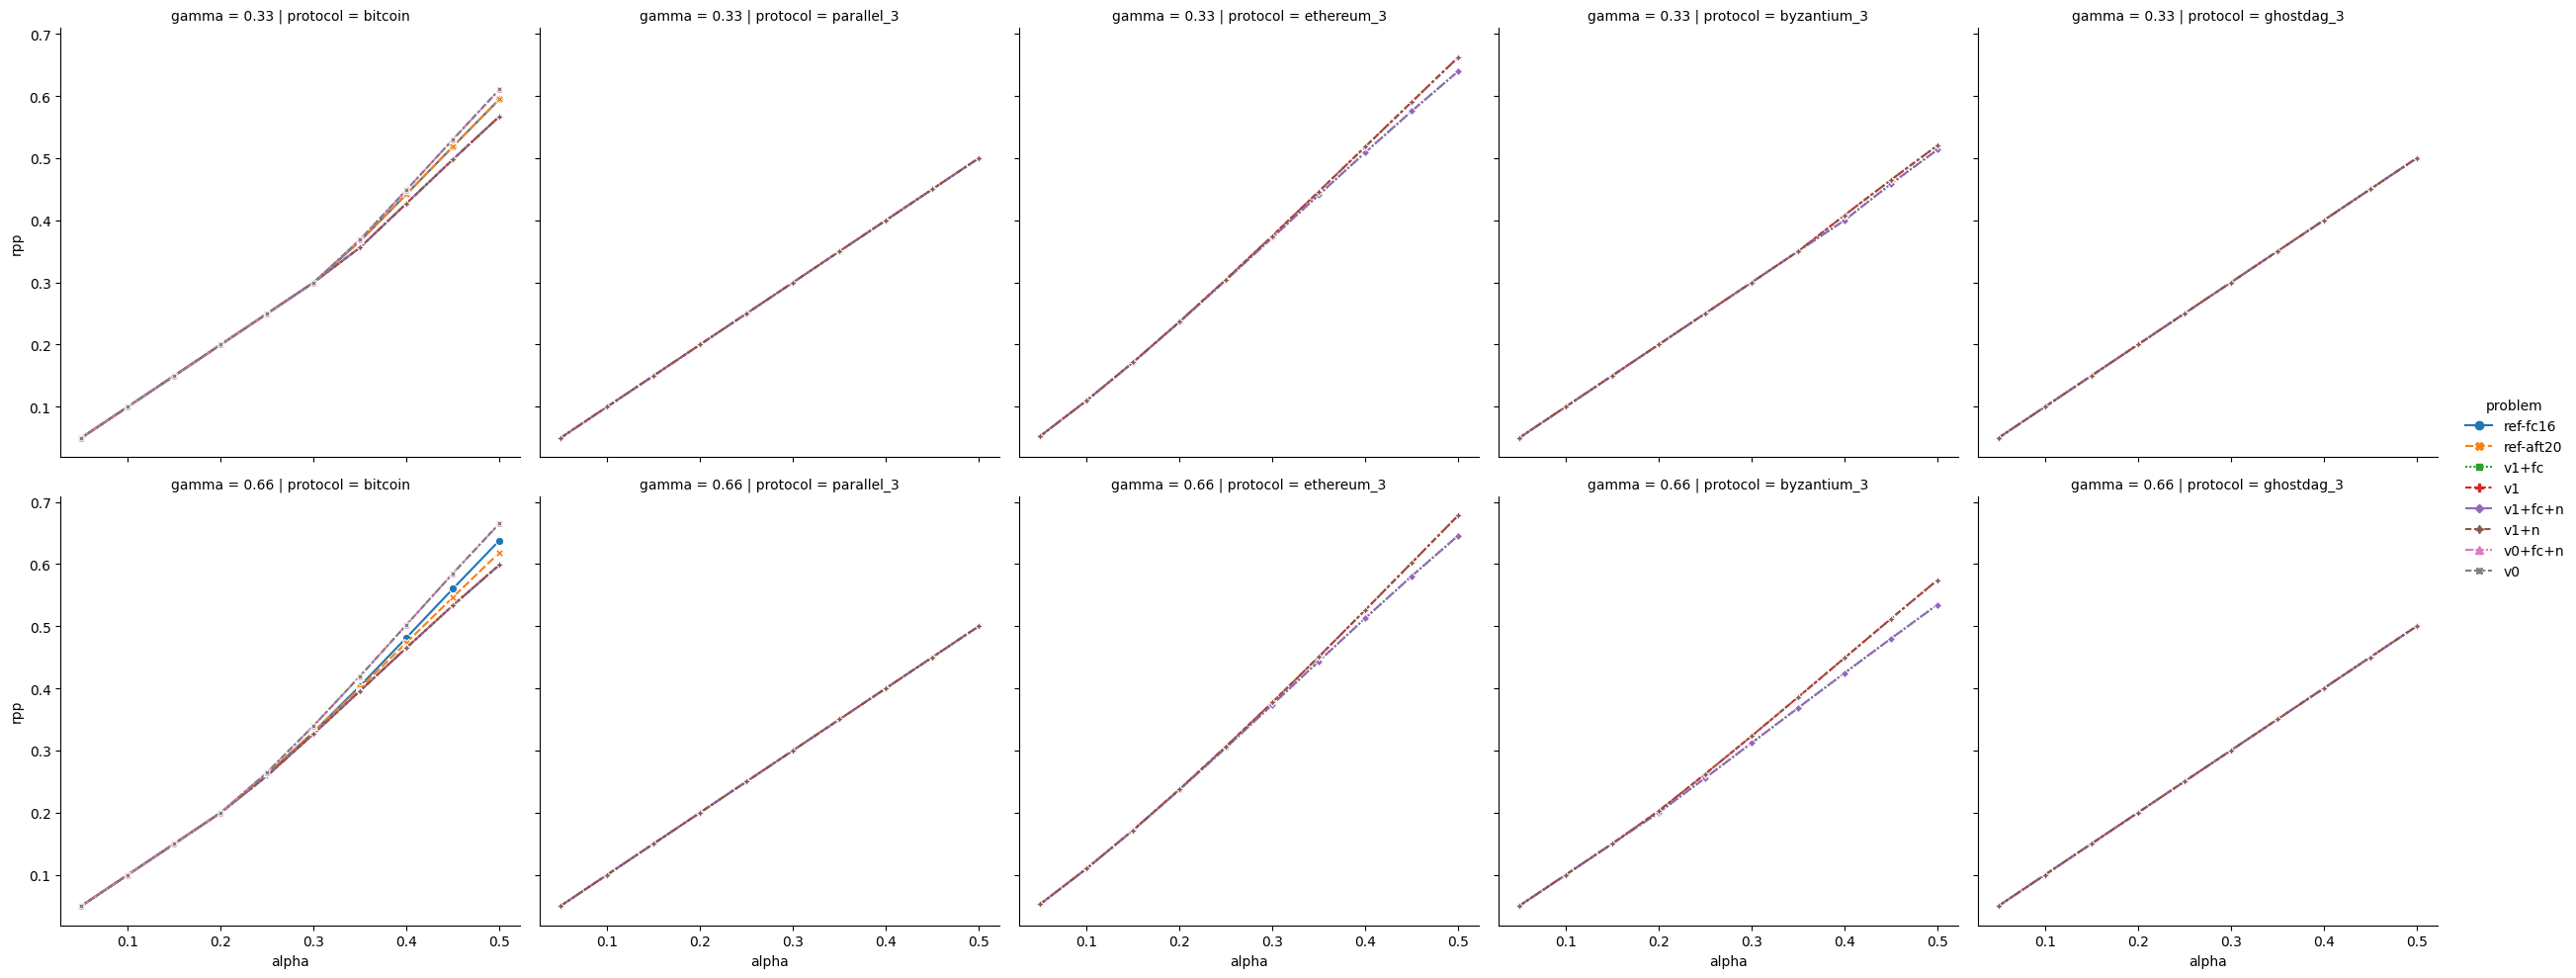

In [5]:
seaborn.relplot(
    data=df,
    kind="line",
    x="alpha",
    y="rpp",
    hue="problem",
    style="problem",
    markers=True,
    col="protocol",
    row="gamma",
)

## Validation v0

The following was lining up perfectly for the first preprint version at maximum fork length = 13

In [6]:
dag_size_limit

4

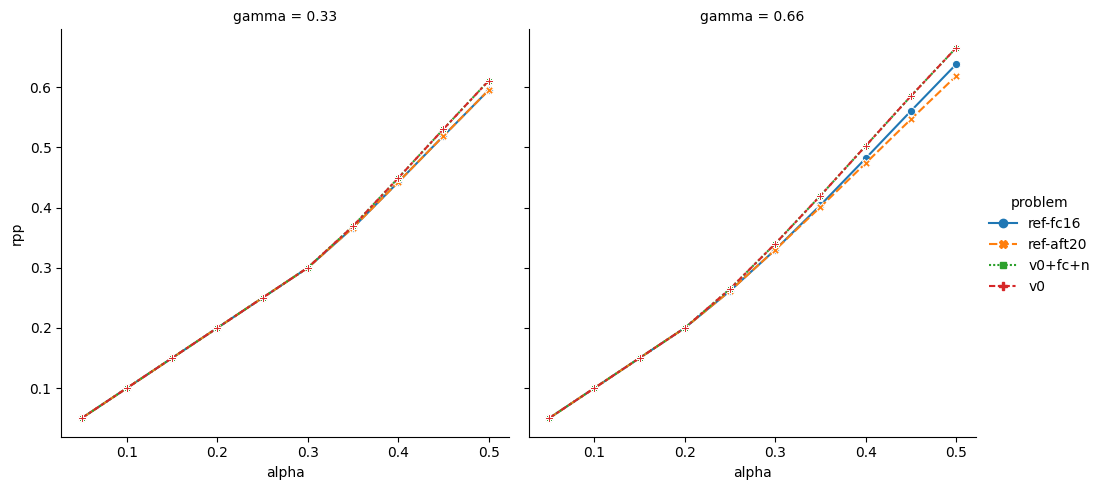

In [7]:
seaborn.relplot(
    data=df.query(
        'protocol == "bitcoin" and (problem.str.startswith("ref") or problem == "v0+fc+n" or problem == "v0")'
    ),
    kind="line",
    x="alpha",
    y="rpp",
    hue="problem",
    style="problem",
    markers=True,
    col="gamma",
)

## Validation v1

The following should line up; I want to claim it in the paper

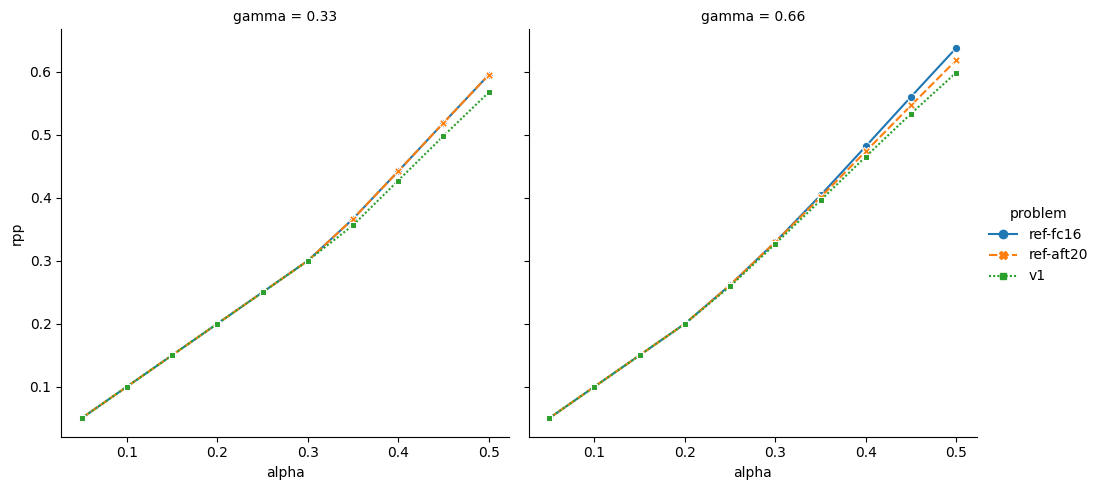

In [8]:
seaborn.relplot(
    data=df.query(
        'protocol == "bitcoin" and (problem.str.startswith("ref") or problem == "v1")'
    ),
    kind="line",
    x="alpha",
    y="rpp",
    hue="problem",
    style="problem",
    markers=True,
    col="gamma",
)

## H: v1 optimizations are neutral for all protocols

No. Exceptions:
- In Ethereum and Byzantium force-consider restricts the attacker. The optimal policy ignores some own blocks.
- In Parallel, canonization seems to enable attacks. I have no glue how this can be.
- In Ghostdag, canonization seems to mitigate attacks. I have no glue how this can be.
- In Ghostdag, canonization causes a split such that force-consider mitigates attacks. I have no glue how this can be.

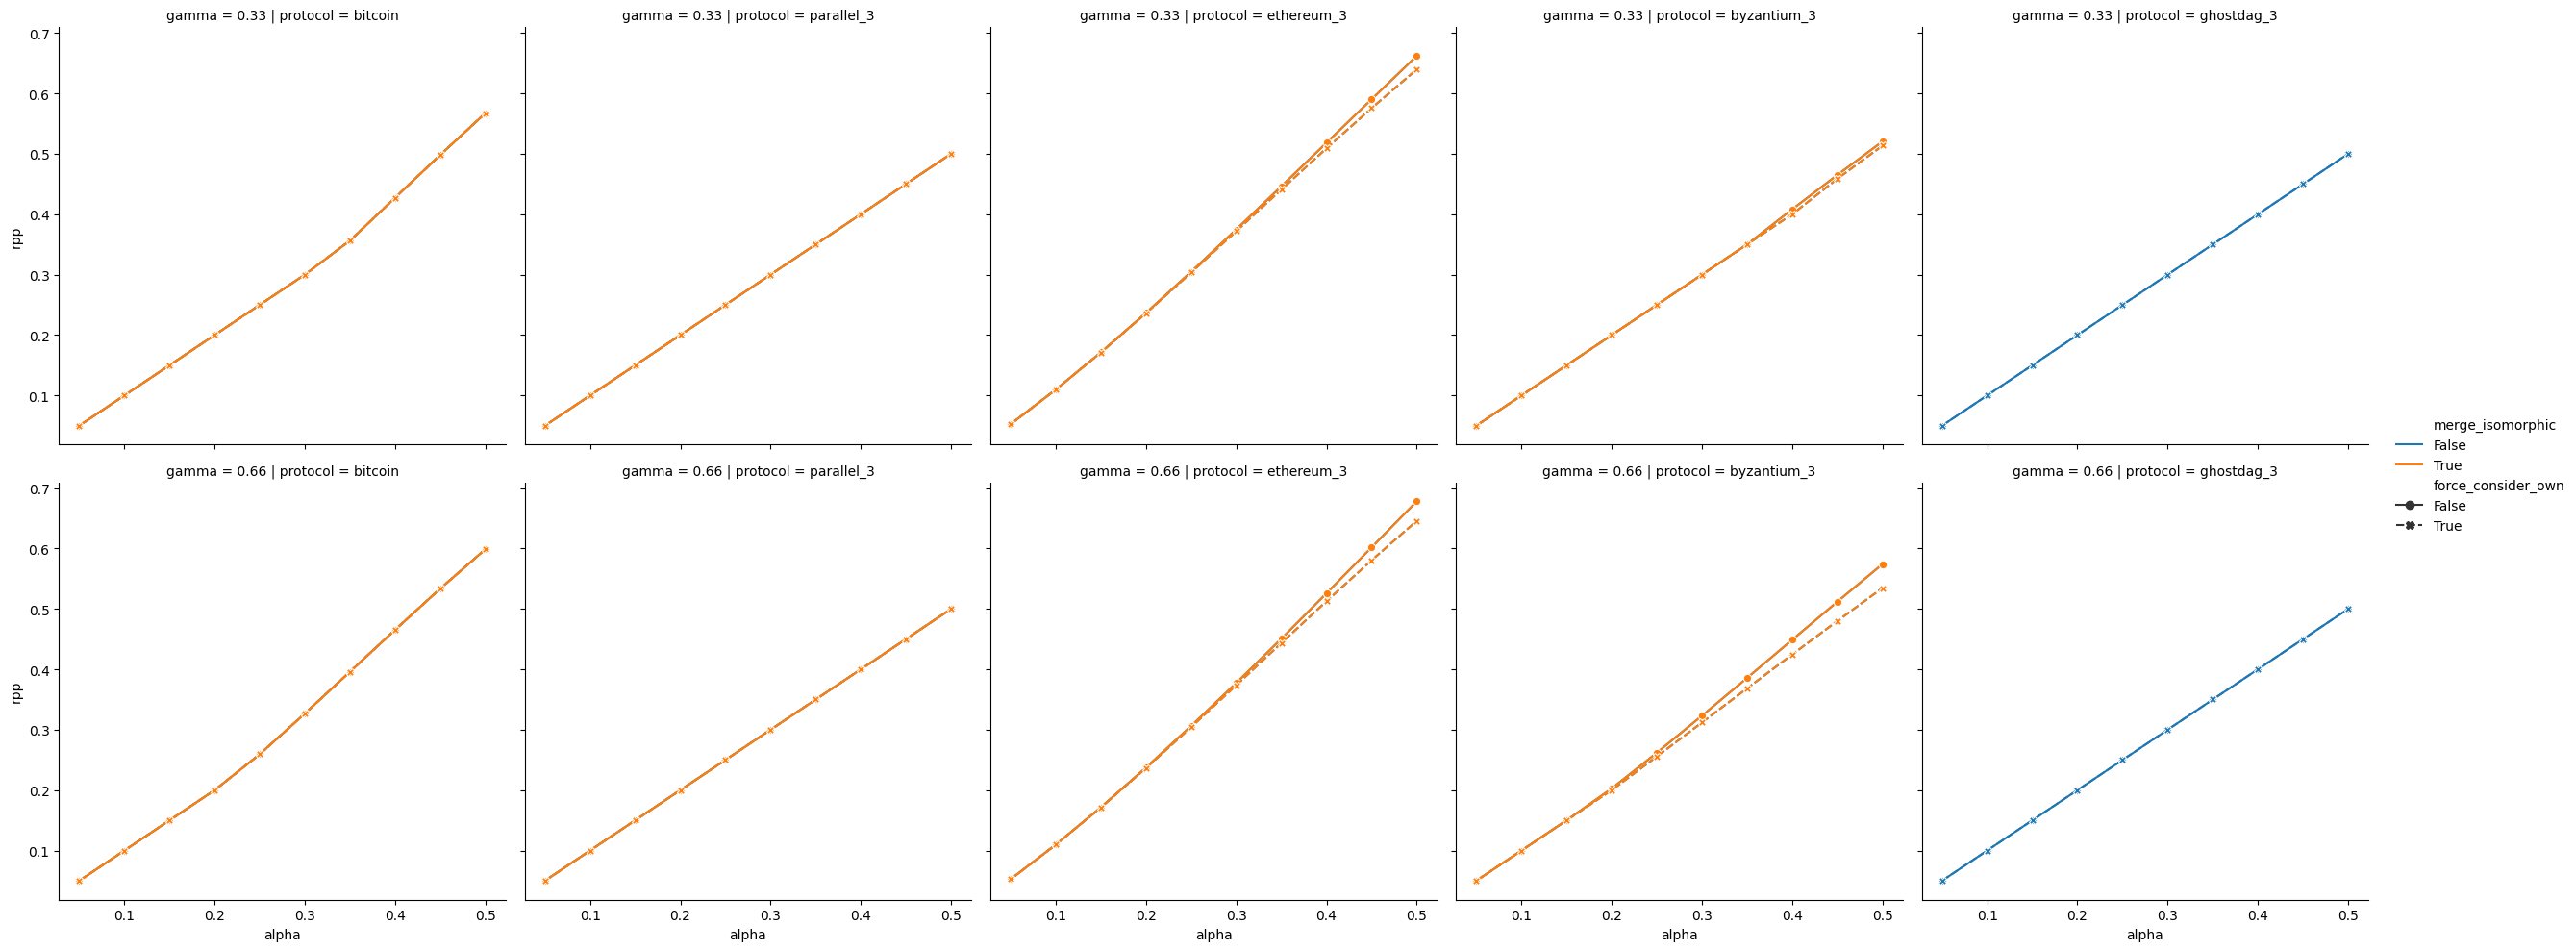

In [9]:
seaborn.relplot(
    data=df.query(
        'problem.str.startswith("v1") and not (protocol == "ghostdag_3" and merge_isomorphic == True)'
    ),
    kind="line",
    x="alpha",
    y="rpp",
    style="force_consider_own",
    hue="merge_isomorphic",
    markers=True,
    col="protocol",
    row="gamma",
)

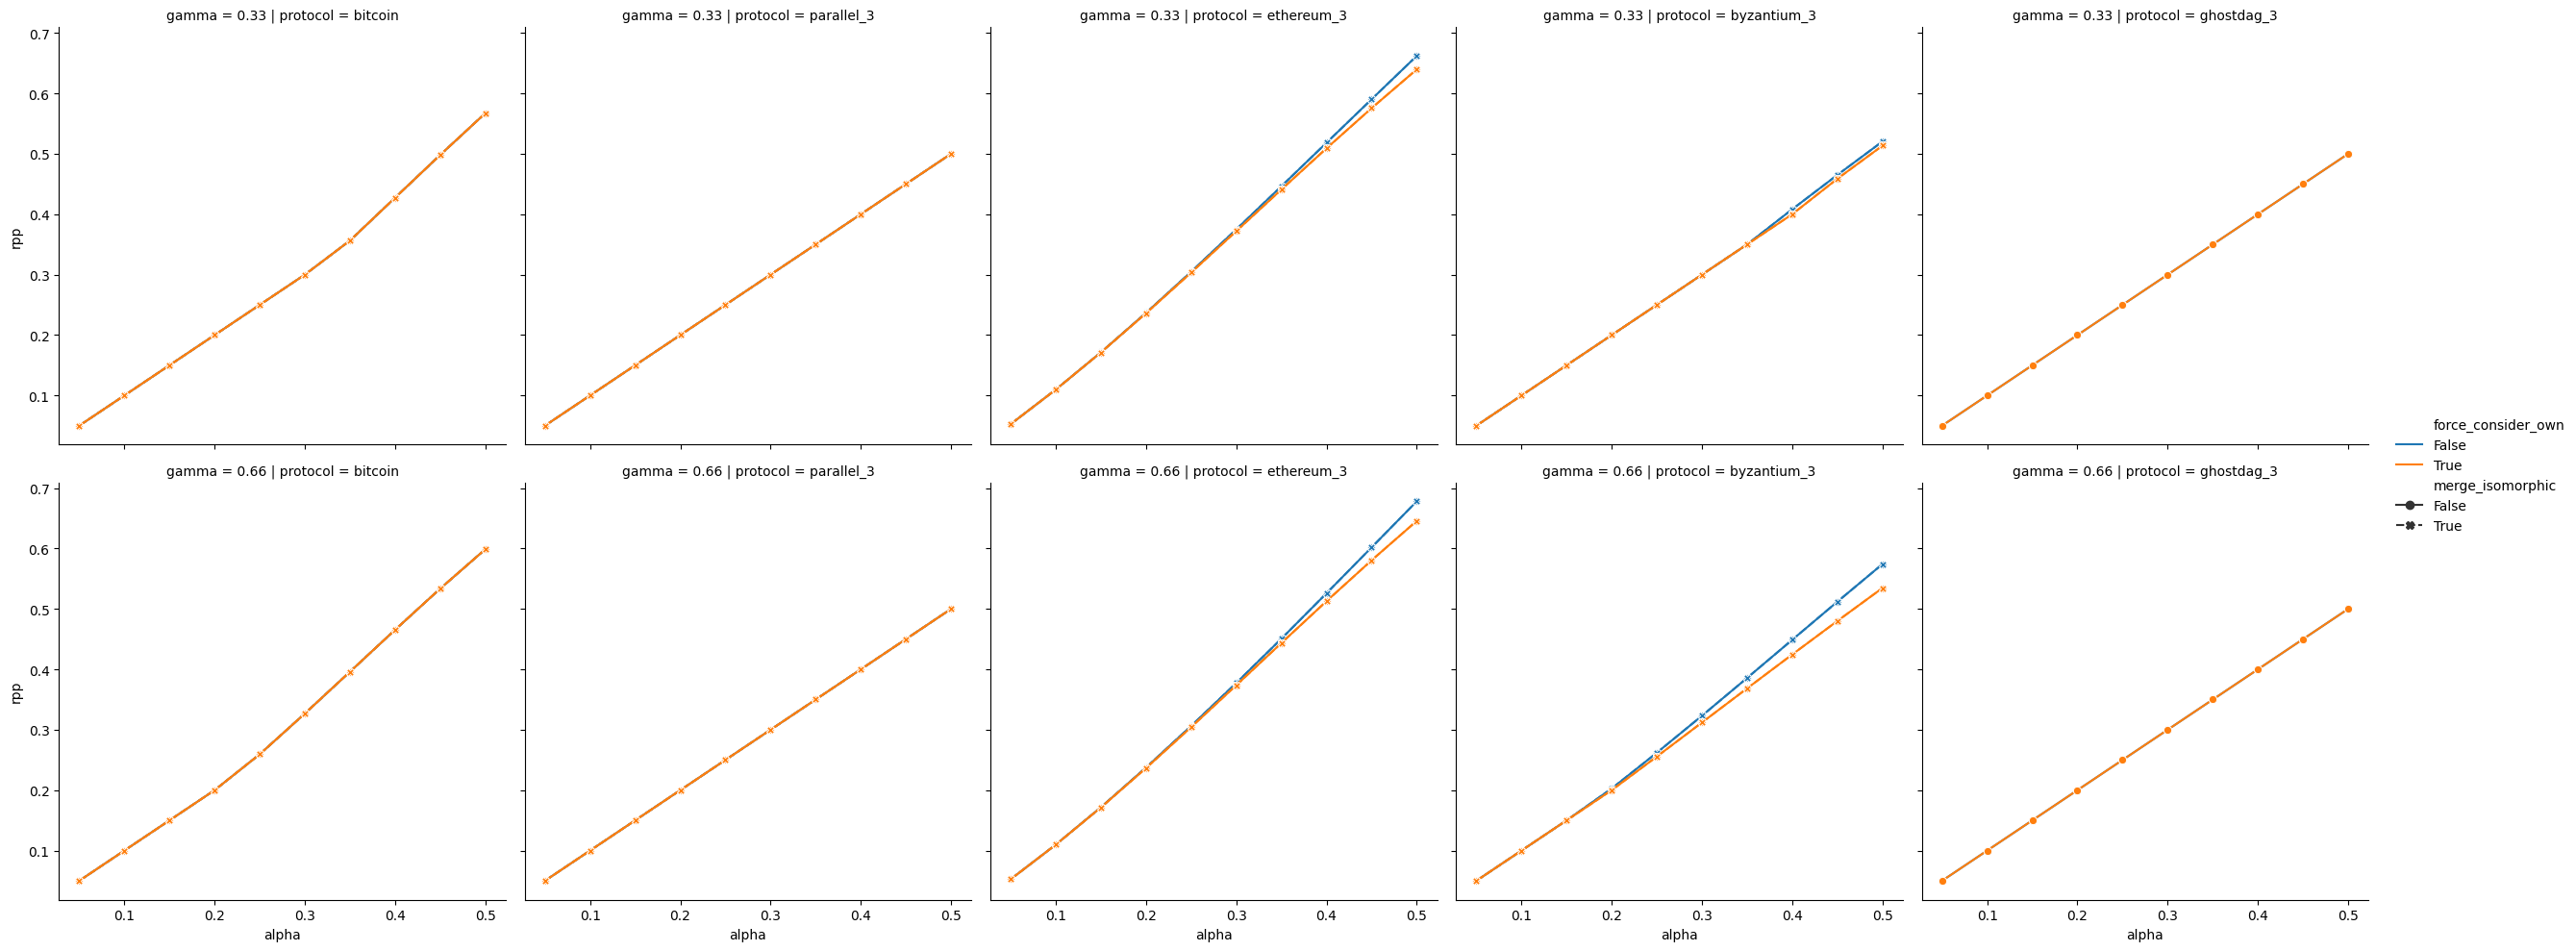

In [10]:
seaborn.relplot(
    data=df.query(
        'problem.str.startswith("v1") and not (protocol == "ghostdag_3" and merge_isomorphic == True)'
    ),
    kind="line",
    x="alpha",
    y="rpp",
    hue="force_consider_own",
    style="merge_isomorphic",
    markers=True,
    col="protocol",
    row="gamma",
)

# Prepare CSV for paper

In [11]:
rpp_of_alpha = df.assign(
    column=lambda d: [
        f"{r.problem}:{r.protocol}:gamma{str(r.gamma)[2:]}:dsl{r.dag_size_limit}"
        for _, r in d.iterrows()
    ]
).pivot(index="alpha", columns="column", values="rpp")
rpp_of_alpha.to_csv("5-rpp-of-alpha.csv")
rpp_of_alpha

column,ref-aft20:bitcoin:gamma33:dsl4,ref-aft20:bitcoin:gamma66:dsl4,ref-fc16:bitcoin:gamma33:dsl4,ref-fc16:bitcoin:gamma66:dsl4,v0+fc+n:bitcoin:gamma33:dsl4,v0+fc+n:bitcoin:gamma66:dsl4,v0:bitcoin:gamma33:dsl4,v0:bitcoin:gamma66:dsl4,v1+fc+n:bitcoin:gamma33:dsl4,v1+fc+n:bitcoin:gamma66:dsl4,...,v1:bitcoin:gamma33:dsl4,v1:bitcoin:gamma66:dsl4,v1:byzantium_3:gamma33:dsl4,v1:byzantium_3:gamma66:dsl4,v1:ethereum_3:gamma33:dsl4,v1:ethereum_3:gamma66:dsl4,v1:ghostdag_3:gamma33:dsl4,v1:ghostdag_3:gamma66:dsl4,v1:parallel_3:gamma33:dsl4,v1:parallel_3:gamma66:dsl4
alpha,,,,,,,,,,,,,,,,,,,,,
0.05,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,...,0.050000,0.050000,0.050000,0.050000,0.052485,0.052490,0.05,0.05,0.05,0.05
0.10,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,...,0.100000,0.100000,0.100000,0.100000,0.109770,0.109834,0.10,0.10,0.10,0.10
0.15,0.150000,0.150000,0.150000,0.150000,0.150000,0.150000,0.150000,0.150000,0.150000,0.150000,...,0.150000,0.150000,0.150000,0.150000,0.171363,0.171668,0.15,0.15,0.15,0.15
0.20,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,...,0.200000,0.200000,0.200000,0.202751,0.236668,0.237411,0.20,0.20,0.20,0.20
0.25,0.250000,0.261557,0.250000,0.261557,0.250000,0.264955,0.250000,0.264955,0.250000,0.259442,...,0.250000,0.259442,0.250000,0.261967,0.304780,0.306296,0.25,0.25,0.25,0.25
0.30,0.300000,0.329898,0.300000,0.329898,0.300000,0.339941,0.300000,0.339941,0.300000,0.326860,...,0.300000,0.326860,0.300000,0.323186,0.374911,0.377401,0.30,0.30,0.30,0.30
0.35,0.366543,0.401006,0.366543,0.404035,0.369115,0.419793,0.369115,0.419793,0.356388,0.396041,...,0.356388,0.396041,0.350000,0.385711,0.446300,0.450678,0.35,0.35,0.35,0.35
0.40,0.442159,0.473699,0.442159,0.481768,0.449033,0.502410,0.449033,0.502410,0.427383,0.465441,...,0.427383,0.465441,0.408186,0.448846,0.518287,0.525887,0.40,0.40,0.40,0.40
0.45,0.518885,0.546688,0.518885,0.560435,0.530329,0.585214,0.530329,0.585214,0.498162,0.533621,...,0.498162,0.533621,0.464963,0.511893,0.590346,0.601905,0.45,0.45,0.45,0.45
